In [1]:
# dataanalysis.ipynb is a jupyter notebook that contains the code for the data analysis of the project.
# It is divided into 7 sections:
# 1. Data Cleaning
# 2. Data Analysis
# 3. Data Visualization
# 4. Data Preprocessing
# 5. Data Modelling
# 6. Data Evaluation
# 7. Data Prediction

# データの概要

In [13]:
# ## 1. Data Cleaning
# In this section, we will clean the data by removing the unnecessary columns and rows, and by filling the missing values.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data_path = '../data/train.csv'
test_data_path = '../data/test.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [10]:
train_data.head()

,Unnamed: 0,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,0,2015-06-29,14,OnCurb,1,NaN,NaN,Damage,Volunteer,NaN,...,QN45,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23
1,1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NaN,...,BX05,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15
2,2,2015-09-13,26,OnCurb,2,NaN,NaN,NoDamage,Volunteer,StonesBranchLights,...,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5,5017011,Staten Island,Staten Island,503,24,62,51
3,3,2016-05-09,15,OnCurb,0,NaN,NaN,Damage,NYC Parks Staff,NaN,...,SI11,Charleston-Richmond Valley-Tottenville,5,5024401,Staten Island,Staten Island,503,24,62,51
4,4,2016-06-24,23,OnCurb,1,NaN,NaN,NoDamage,Volunteer,Stones,...,MN03,Central Harlem North-Polo Grounds,1,1022102,Manhattan,New York,110,30,70,9


In [9]:
train_data.describe()

,Unnamed: 0,tree_dbh,health,borocode,boro_ct,cb_num,st_senate,st_assem,cncldist
count,19984.000000,19984.000000,19984.000000,19984.000000,1.998400e+04,19984.000000,19984.000000,19984.000000,19984.000000
mean,9991.500000,11.694906,0.858036,3.360088,3.405346e+06,343.159077,21.111189,51.913981,30.346327
std,5769.028226,8.198150,0.437807,1.232246,1.239741e+06,122.264942,7.188537,18.642931,14.824068
min,0.000000,1.000000,0.000000,1.000000,1.000202e+06,101.000000,10.000000,23.000000,1.000000
25%,4995.750000,5.000000,1.000000,3.000000,3.005900e+06,301.000000,15.000000,33.000000,19.000000
50%,9991.500000,9.000000,1.000000,4.000000,4.009200e+06,402.000000,22.000000,56.000000,31.000000
75%,14987.250000,17.000000,1.000000,4.000000,4.122300e+06,413.000000,25.000000,64.000000,44.000000
max,19983.000000,42.000000,2.000000,5.000000,5.031902e+06,503.000000,36.000000,87.000000,51.000000


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19984 entries, 0 to 19983
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  19984 non-null  object
 1   tree_dbh    19984 non-null  int64 
 2   curb_loc    19984 non-null  object
 3   health      19984 non-null  int64 
 4   steward     5101 non-null   object
 5   guards      5041 non-null   object
 6   sidewalk    19984 non-null  object
 7   user_type   19984 non-null  object
 8   problems    7741 non-null   object
 9   spc_common  19984 non-null  object
 10  spc_latin   19984 non-null  object
 11  nta         19984 non-null  object
 12  nta_name    19984 non-null  object
 13  borocode    19984 non-null  int64 
 14  boro_ct     19984 non-null  int64 
 15  boroname    19984 non-null  object
 16  zip_city    19984 non-null  object
 17  cb_num      19984 non-null  int64 
 18  st_senate   19984 non-null  int64 
 19  st_assem    19984 non-null  int64 
 20  cncldi

In [20]:
train_data.isnull().sum()

created_at        0
tree_dbh          0
curb_loc          0
health            0
steward       14883
guards        14943
sidewalk          0
user_type         0
problems      12243
spc_common        0
spc_latin         0
nta               0
nta_name          0
borocode          0
boro_ct           0
boroname          0
zip_city          0
cb_num            0
st_senate         0
st_assem          0
cncldist          0
dtype: int64

In [19]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)

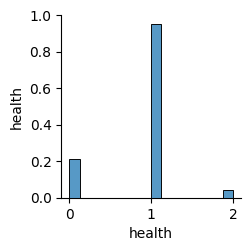

In [28]:
sns.pairplot(train_data)
plt.grid(True)

In [31]:
missing_values = train_data.isnull().sum()

data_info = pd.DataFrame({'Data Type': train_data.dtypes, 'Missing Values': missing_values, 'Missing %': (missing_values / len(train_data)) * 100})

data_info

,Data Type,Missing Values,Missing %
created_at,object,0,0.000000
tree_dbh,int64,0,0.000000
curb_loc,object,0,0.000000
health,int64,0,0.000000
steward,object,14883,74.474580
guards,object,14943,74.774820
sidewalk,object,0,0.000000
user_type,object,0,0.000000
problems,object,12243,61.264011
spc_common,object,0,0.000000


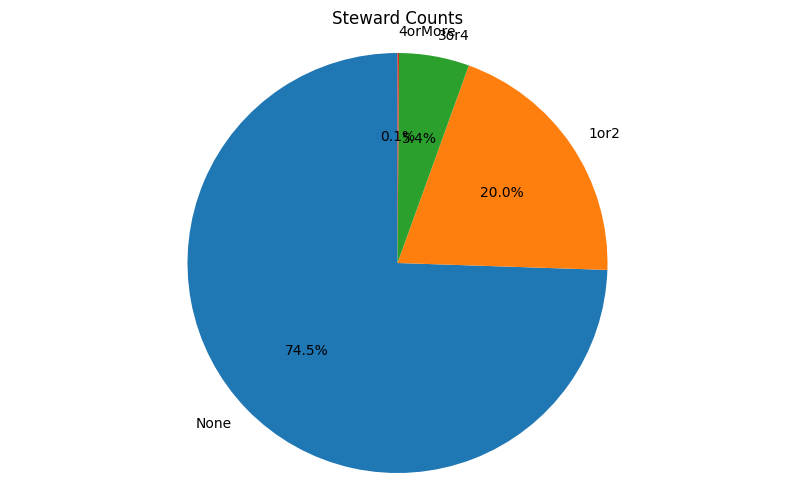

In [41]:
train_data['steward'] = train_data['steward'].fillna('None')

steward_counts = train_data['steward'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(steward_counts, labels=steward_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Steward Counts')
plt.axis('equal')
plt.show()

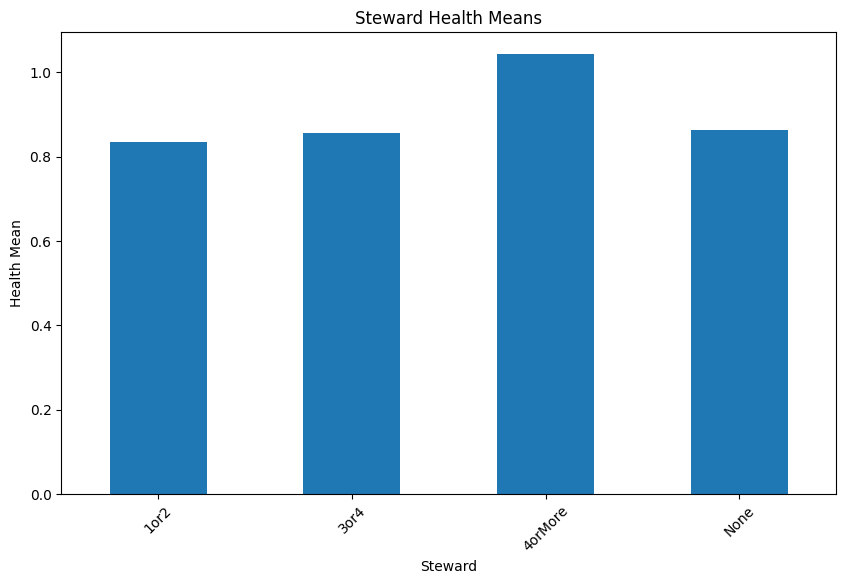

In [46]:
steward_health_means = train_data.groupby('steward')['health'].mean()

plt.figure(figsize=(10, 6))
steward_health_means.plot(kind='bar')
plt.title('Steward Health Means')
plt.xlabel('Steward')
plt.ylabel('Health Mean')
plt.xticks(rotation=45)
plt.show()

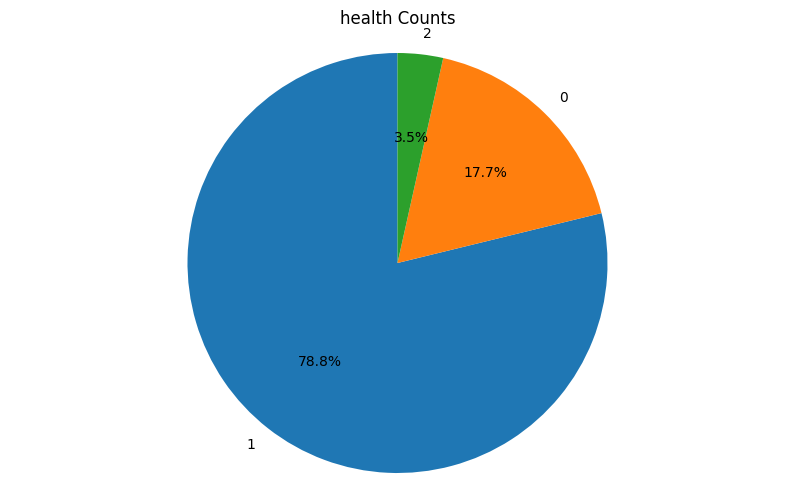

In [47]:
train_data['health'] = train_data['health']

health_counts = train_data['health'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(health_counts, labels=health_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('health Counts')
plt.axis('equal')
plt.show()

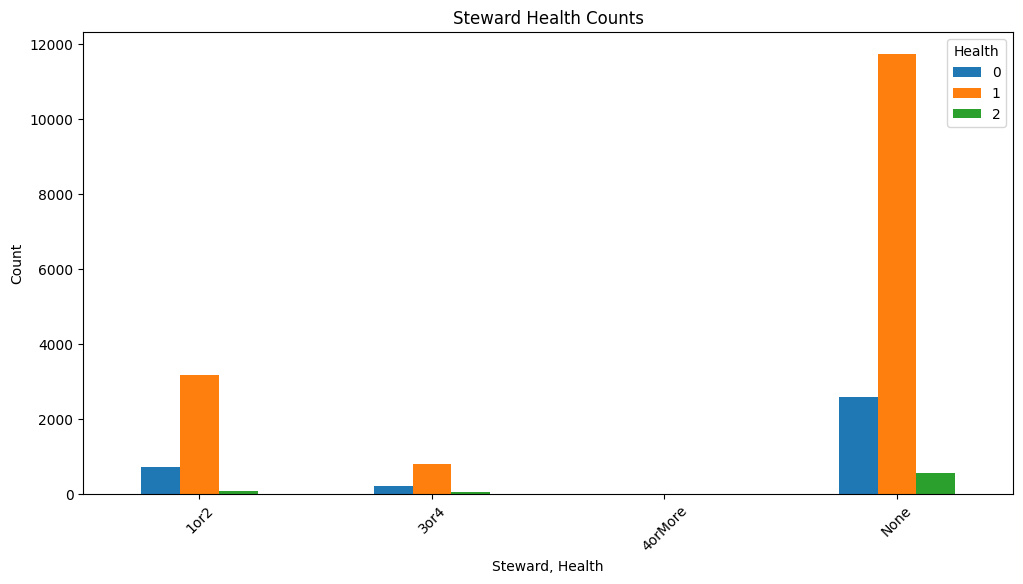

In [53]:
steward_healh_counts = train_data.groupby(['steward', 'health']).size().unstack()

steward_healh_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Steward Health Counts')
plt.xlabel('Steward, Health')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Health', labels=['0', '1', '2'])
plt.show()

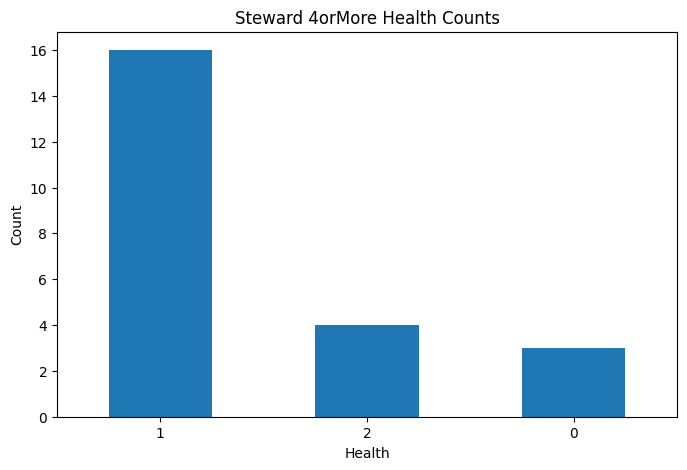

In [54]:
steward_4orMore_health_counts = train_data[train_data['steward'] == '4orMore']['health'].value_counts()

steward_4orMore_health_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Steward 4orMore Health Counts')
plt.xlabel('Health')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

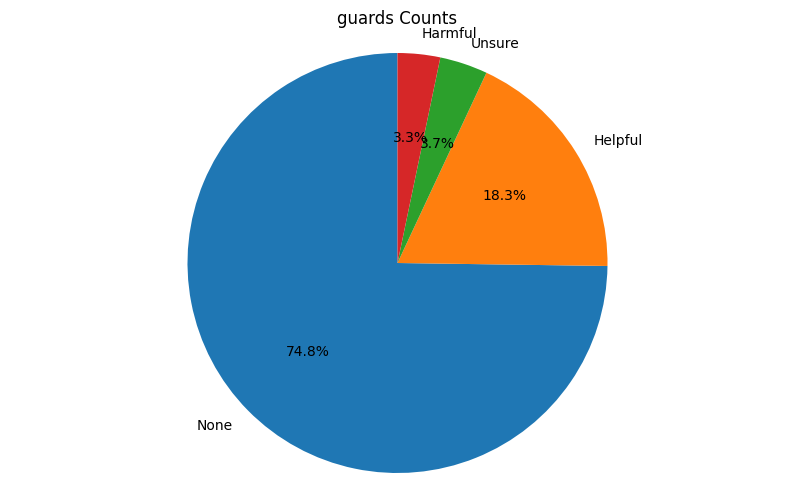

In [55]:
train_data['guards'] = train_data['guards'].fillna('None')

guards_counts = train_data['guards'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(guards_counts, labels=guards_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('guards Counts')
plt.axis('equal')
plt.show()

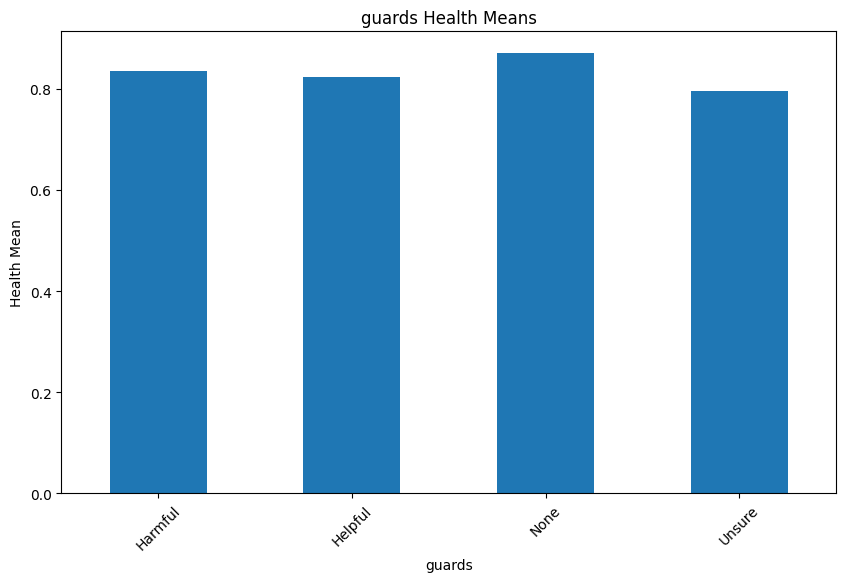

In [56]:
guards_health_means = train_data.groupby('guards')['health'].mean()

plt.figure(figsize=(10, 6))
guards_health_means.plot(kind='bar')
plt.title('guards Health Means')
plt.xlabel('guards')
plt.ylabel('Health Mean')
plt.xticks(rotation=45)
plt.show()

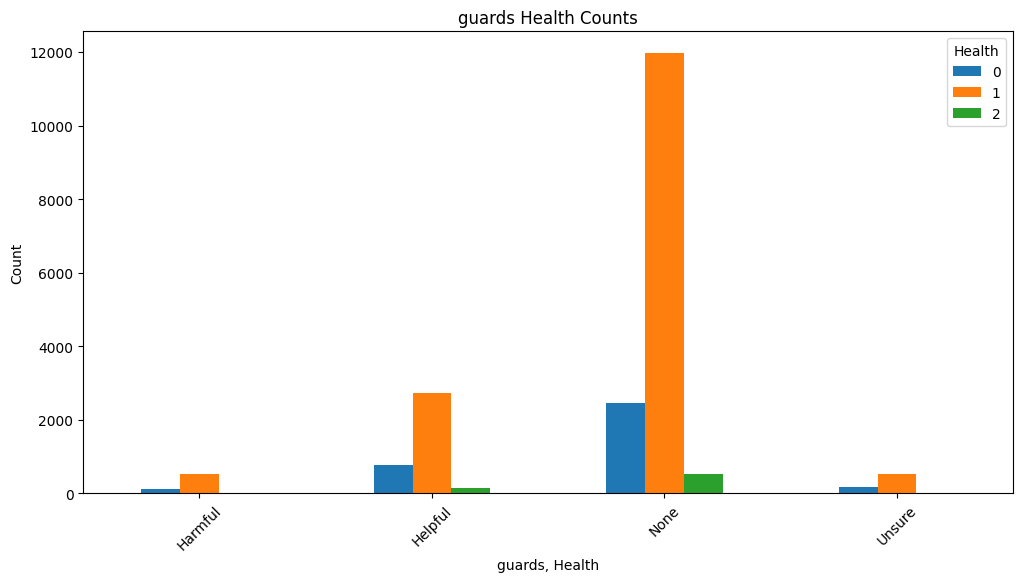

In [57]:
guards_healh_counts = train_data.groupby(['guards', 'health']).size().unstack()

guards_healh_counts.plot(kind='bar', figsize=(12, 6))
plt.title('guards Health Counts')
plt.xlabel('guards, Health')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Health', labels=['0', '1', '2'])
plt.show()